In [1]:
# %load /Users/wayment/ipynb_defaults.py
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import sys


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


3IOSA_1.pdb 3IOSA_028_1.pdb
3KCMA_1.pdb 3KCMA_152_1.pdb
3C71A_1.pdb 3C71A_112_1.pdb
4NMUD_1.pdb 4NMUD_111_1.pdb
3OR5A_1.pdb 3OR5A_140_1.pdb
2LS5A_1.pdb 2LS5A_069_1.pdb
3GL3D_1.pdb
1KNGA_1.pdb
3U5RE_1.pdb
5UM7B_1.pdb


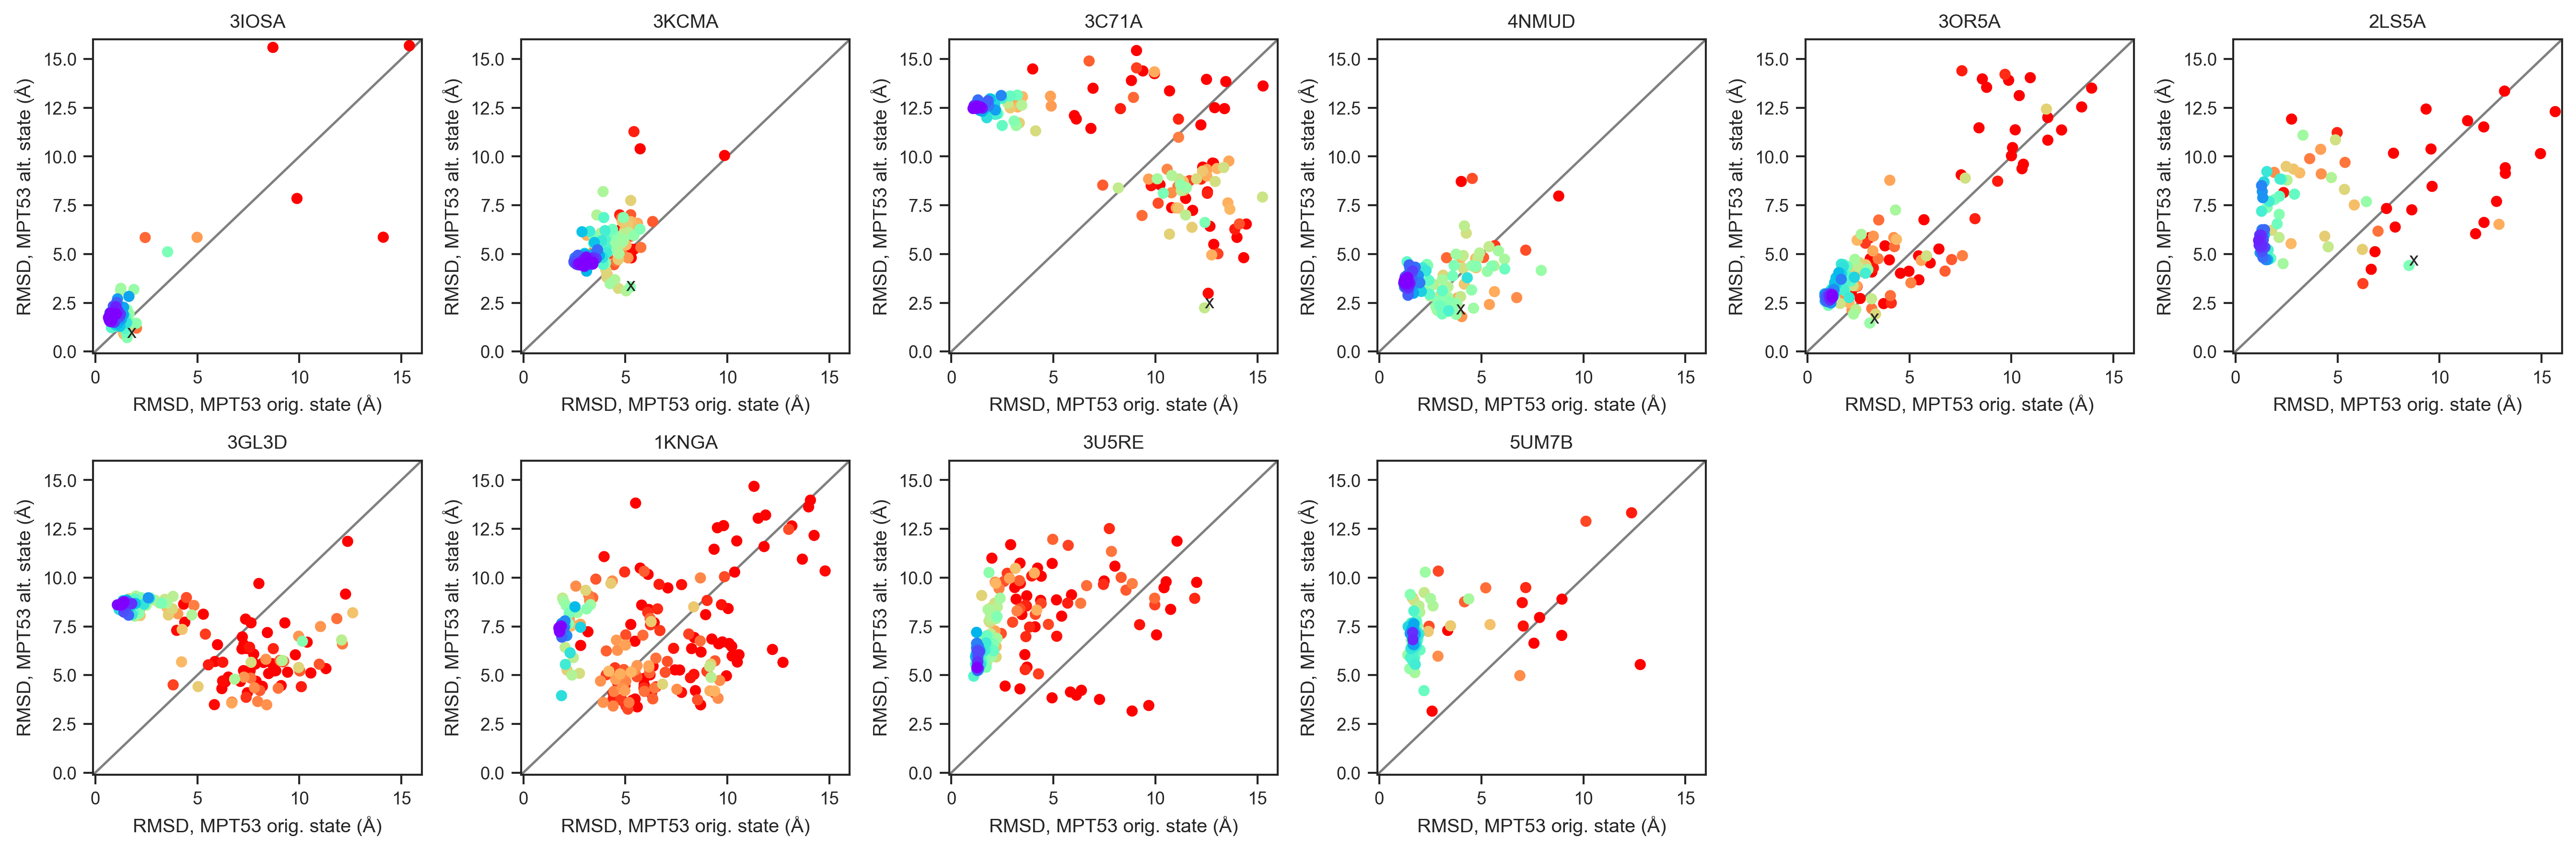

In [2]:
orig_state_matches = ['3IOSA', '3KCMA','3C71A', '4NMUD','3OR5A','2LS5A', '3GL3D', '1KNGA',  '3U5RE', '5UM7B'] 
alt_state_matches = ['2EC4', '2L57', '2OKA', '3EMX', '3GL5', '3PH9', '3W8J', '4EUY', '6MZA']

d = pd.read_csv('output.tsv',delimiter='\t')
d['protein'] = [x.split('_')[0] for x in d['pdb']]

figure(figsize=(18,6))
for i, p in enumerate(orig_state_matches):
    subplot(2,6,i+1)
    tmp = d.loc[d.protein==p]
    tmp = tmp.sort_values('pLDDT',ascending=True)
    plot([-0.1,20],[-0.1,20],color='grey',zorder=0)

    xlim([-0.1,16])
    ylim([-0.1,16])
    scatter(tmp['RMSD_orig'],tmp['RMSD_alt'],c=tmp['pLDDT'],vmin=50,vmax=90,cmap='rainbow_r')
    ctr=0
    tmp = tmp.sort_values('RMSD_alt',ascending=True)

    lst=[p+'_1.pdb']
    for _,row in tmp.iterrows():
        if row['RMSD_alt'] < 4.5 and row['RMSD_alt'] < row['RMSD_orig'] and row['pLDDT']>62 and ctr < 1:
            text(row['RMSD_orig'],row['RMSD_alt'],'x')
            lst.append(row['pdb'])
            ctr+=1
    print(' '.join(lst))
    title(p)
    xlabel('RMSD, MPT53 orig. state (Å)')
    ylabel('RMSD, MPT53 alt. state (Å)')
tight_layout()
#savefig('orig_state_matches.pdf',bbox_inches='tight')

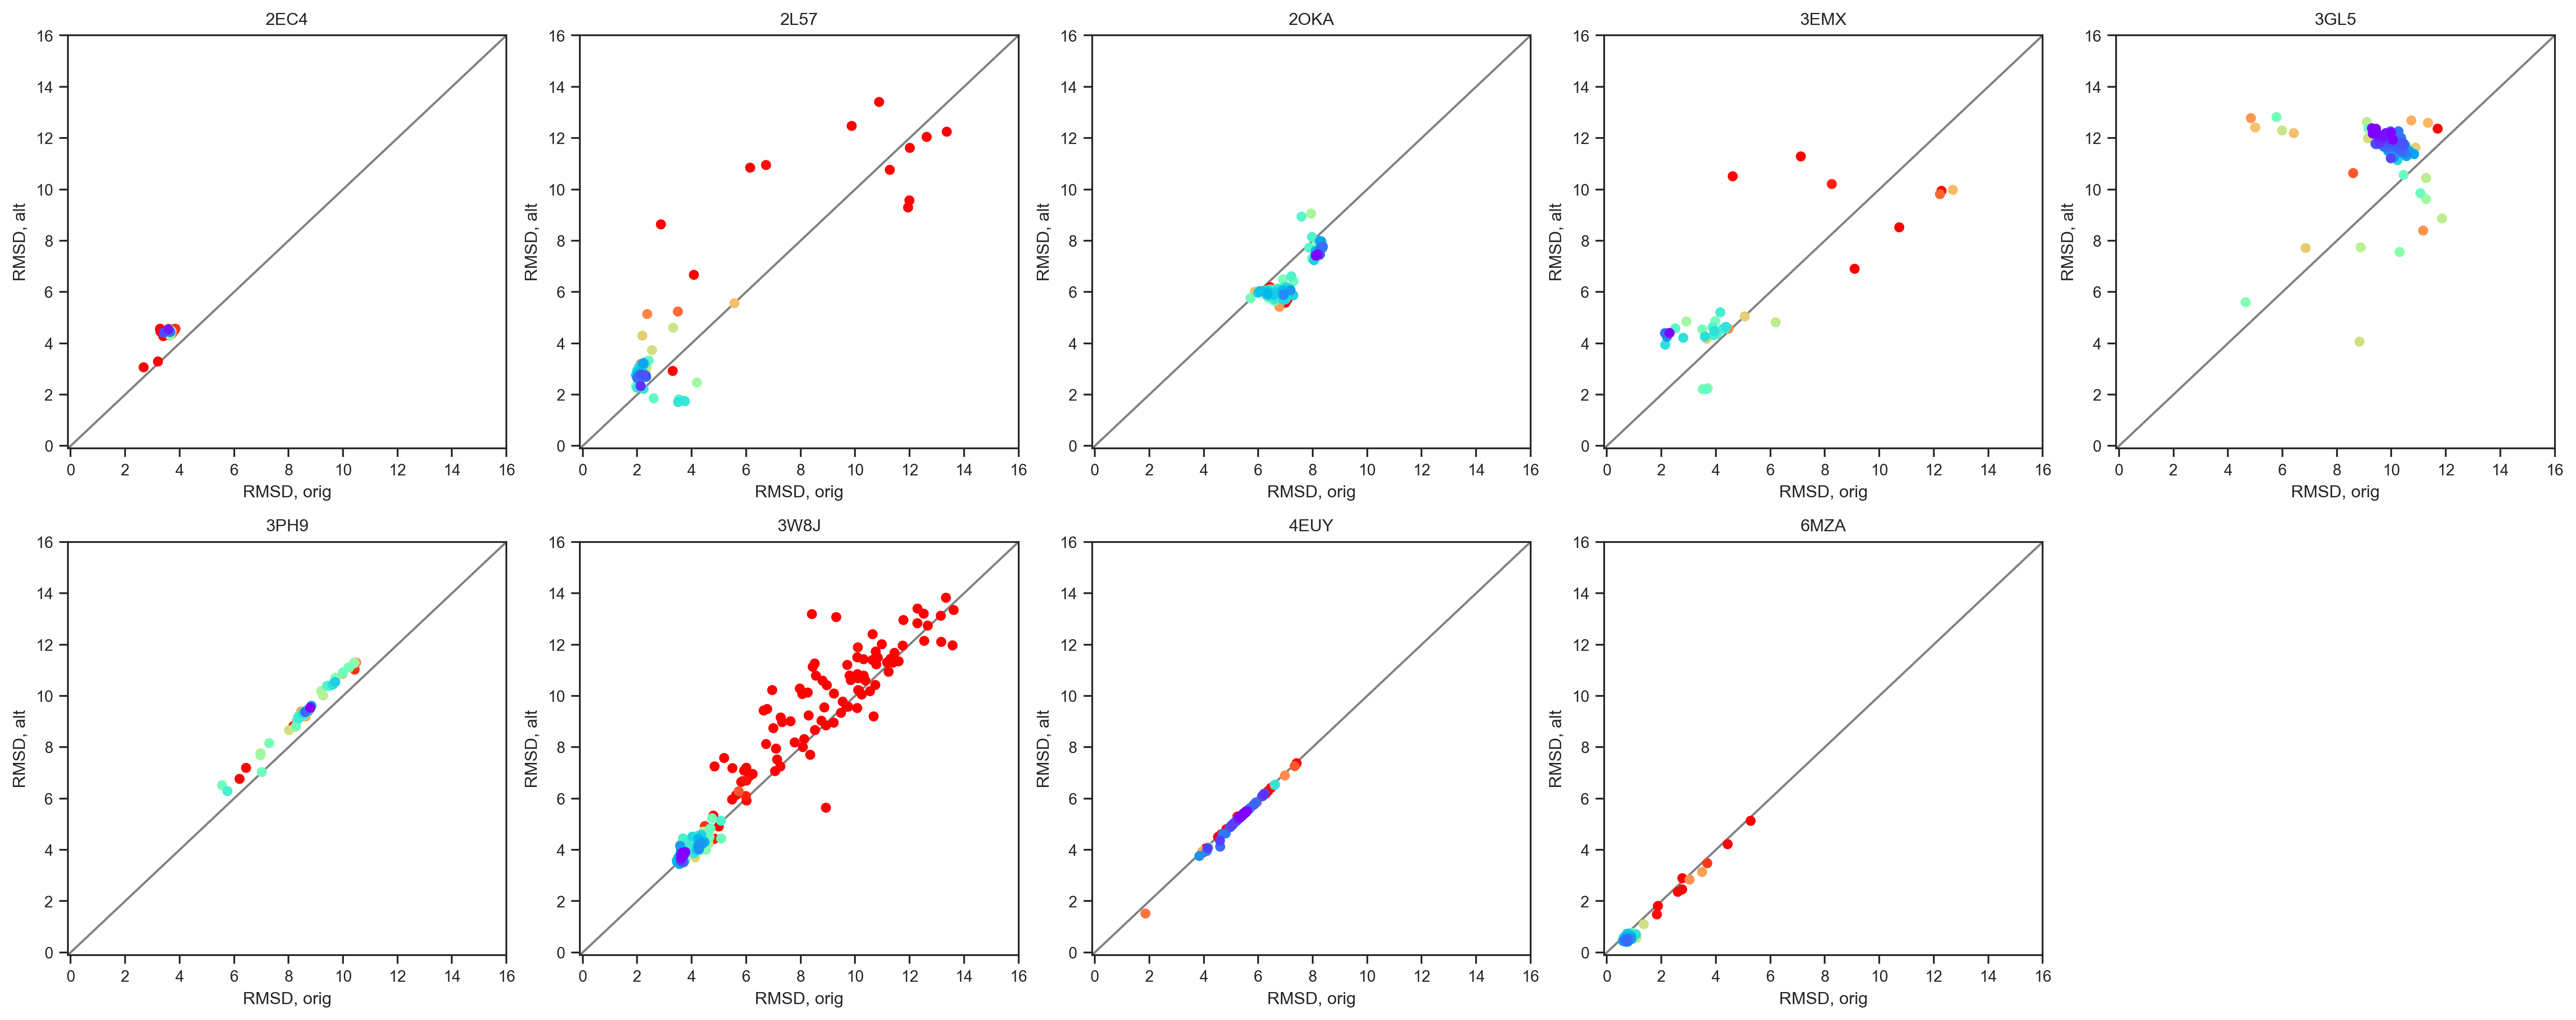

In [3]:
figure(figsize=(20,8))
for i, p in enumerate(alt_state_matches):
    subplot(2,5,i+1)
    tmp = d.loc[d.protein==p]
    tmp = tmp.sort_values('pLDDT',ascending=True)
    xlim([-0.1,16])
    ylim([-0.1,16])
    plot([-0.1,16],[-0.1,16],color='grey',zorder=0)
    scatter(tmp['RMSD_orig'],tmp['RMSD_alt'],c=tmp['pLDDT'],vmin=50,vmax=90,cmap='rainbow_r')
    title(p)
    xlabel('RMSD, orig')
    ylabel('RMSD, alt')
tight_layout()
#savefig('alt_state_matches.pdf',bbox_inches='tight')

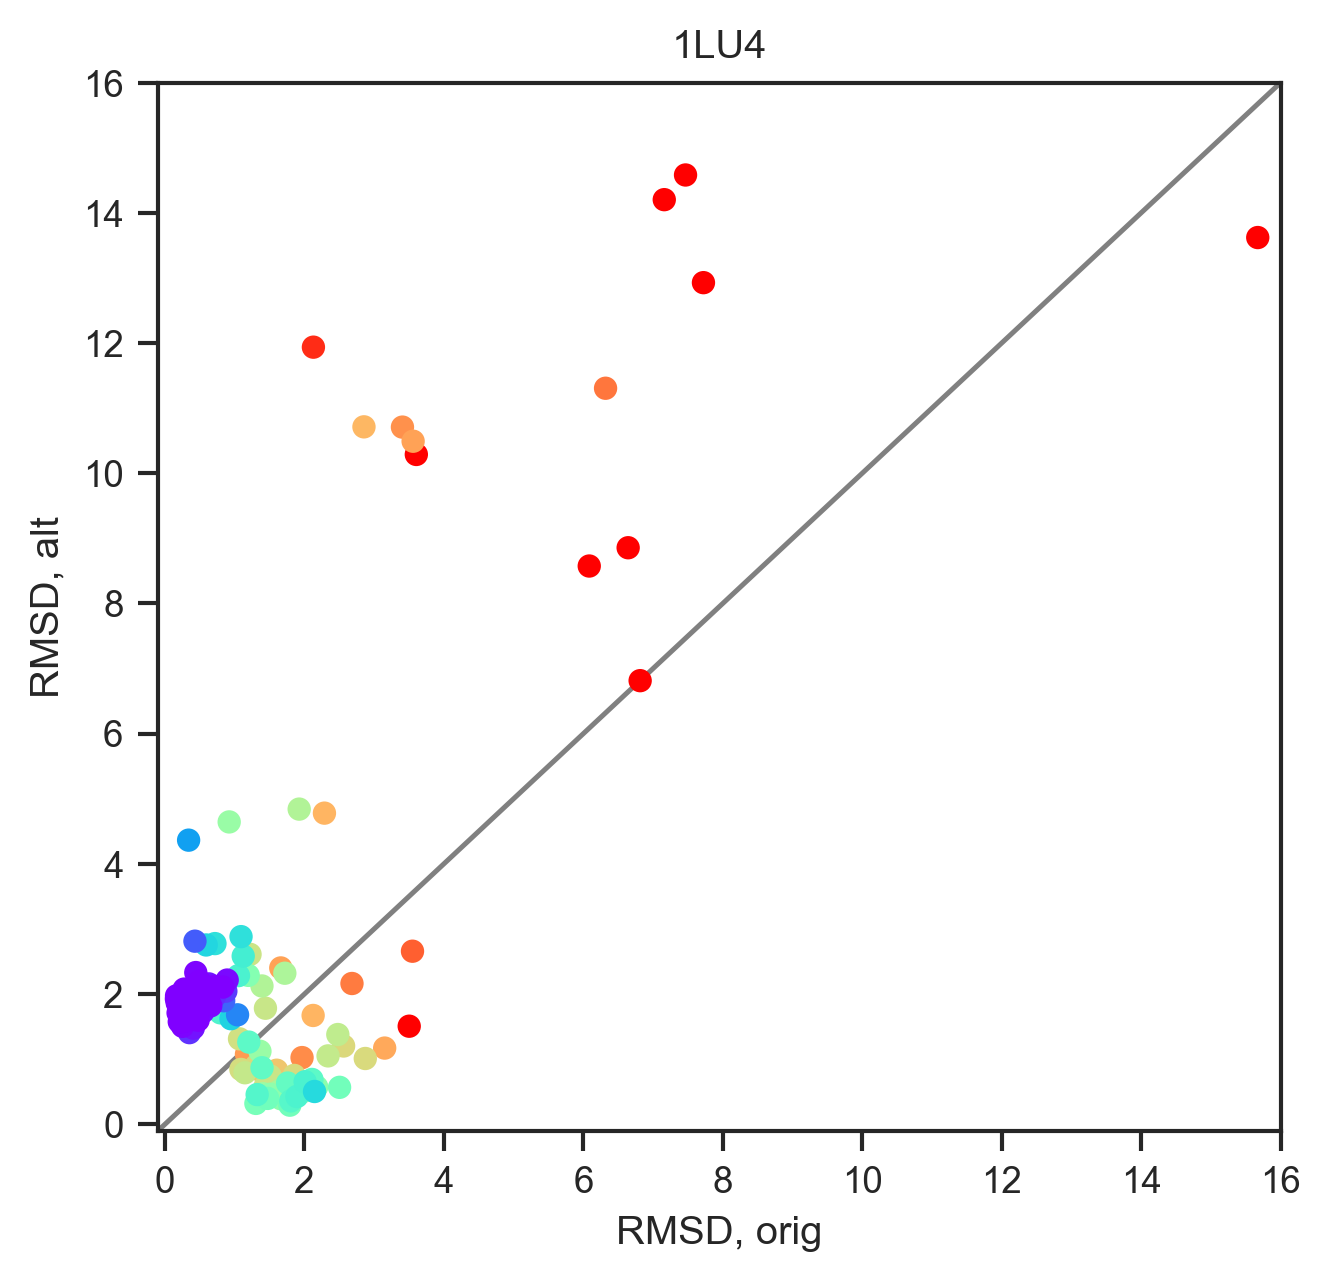

In [5]:
figure(figsize=(20,8))
for i, p in enumerate(['1LU4']):
    subplot(2,5,i+1)
    tmp = d.loc[d.protein==p]
    tmp = tmp.sort_values('pLDDT',ascending=True)

    scatter(tmp['RMSD_orig'],tmp['RMSD_alt'],c=tmp['pLDDT'],vmin=50,vmax=90,cmap='rainbow_r')
    xlim([-0.1,16])
    ylim([-0.1,16])
    plot([-0.1,16],[-0.1,16],color='grey',zorder=0)

    title(p)
    xlabel('RMSD, orig')
    ylabel('RMSD, alt')
tight_layout()
#savefig('1LU4.pdf',bbox_inches='tight')

In [4]:
# get pdb models for figure
for i, p in enumerate(orig_state_matches):
    lst=[]

    tmp = d.loc[d.protein==p]
    tmp = tmp.sort_values('pLDDT',ascending=False)
    
    for _,row in tmp.iterrows():
        if row['RMSD_alt'] < 4.5 and row['RMSD_alt'] < row['RMSD_orig']:
            lst.append(row['pdb'])

    print(' '.join(lst[:5]))

3IOSA_106_1.pdb 3IOSA_152_1.pdb 3IOSA_085_1.pdb 3IOSA_062_1.pdb 3IOSA_028_1.pdb
3KCMA_138_1.pdb 3KCMA_066_1.pdb 3KCMA_053_1.pdb 3KCMA_152_1.pdb 3KCMA_176_1.pdb
3C71A_112_1.pdb 3C71A_132_1.pdb
4NMUD_152_1.pdb 4NMUD_096_1.pdb 4NMUD_034_1.pdb 4NMUD_015_1.pdb 4NMUD_135_1.pdb
3OR5A_140_1.pdb 3OR5A_031_1.pdb 3OR5A_060_1.pdb 3OR5A_043_1.pdb 3OR5A_111_1.pdb
2LS5A_069_1.pdb 2LS5A_053_1.pdb 2LS5A_088_1.pdb
3GL3D_144_1.pdb 3GL3D_095_1.pdb 3GL3D_152_1.pdb 3GL3D_005_1.pdb 3GL3D_151_1.pdb
1KNGA_160_1.pdb 1KNGA_189_1.pdb 1KNGA_174_1.pdb 1KNGA_018_1.pdb 1KNGA_110_1.pdb
3U5RE_125_1.pdb 3U5RE_139_1.pdb 3U5RE_180_1.pdb 3U5RE_183_1.pdb 3U5RE_164_1.pdb

